In [ ]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_item.csv','order_item')  # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='freecodecamp',
    database='Ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:\\Users\\Acer\\Downloads\\trash filees\\sqpy'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Acer\\Downloads\\trash filees\\sqpy\\order_item.csv'

In [1]:
import pandas as pd
import mysql.connector
import os

# Corrected CSV file and its table name
csv_file = 'order_items.csv'
table_name = 'order_item'

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='freecodecamp',
    database='Ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV file
folder_path = 'C:\\Users\\Acer\\Downloads\\trash filees\\sqpy'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

file_path = os.path.join(folder_path, csv_file)

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Replace NaN with None to handle SQL NULL
df = df.where(pd.notnull(df), None)

# Debugging: Check for NaN values
print(f"Processing {csv_file}")
print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

# Clean column names
df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

# Generate the CREATE TABLE statement with appropriate data types
columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
cursor.execute(create_table_query)

# Insert DataFrame data into the MySQL table
for _, row in df.iterrows():
    # Convert row to tuple and handle NaN/None explicitly
    values = tuple(None if pd.isna(x) else x for x in row)
    sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
    cursor.execute(sql, values)

# Commit the transaction
conn.commit()

# Close the connection
conn.close()


Processing order_items.csv
NaN values before replacement:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np


# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='freecodecamp',
    database='Ecommerce'
)
cursor = conn.cursor()



List all the unique cities where customers are located.

In [5]:
query = """select distinct customer_city from customers """

cursor.execute(query)

data = cursor.fetchall()

data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

Count the number of orders placed in 2017.

In [8]:
query = """select count(order_id) from orders where year(order_purchase_timestamp) = 2017"""

cursor.execute(query)

data = cursor.fetchall()

'Total orders placed in 2017 are ', data[0][0]

('Total orders placed in 2017 are ', 45101)

 Find the total sales per category.


In [ ]:
query = """select products.product_category category , round(sum(payments.payment_value),2)
from products join order_item
on products.product_id = order_item.product_id
join payments
on payments.order_id = order_item.order_id
group by category """

cursor.execute(query)

data = cursor.fetchall()
 
df = pd.DataFrame(data, columns=['Category', 'Total Payment'])

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Payment', y='Category', data=df, palette='viridis')
plt.title('Total Payment by Product Category', fontsize=16)
plt.xlabel('Total Payment', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


,0,1
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


Calculate the percentage of orders that were paid in installments.


In [15]:
query = """ select sum(case when payment_installments >= 1 then 1
else 0 end )/count(*)*100 from payments"""

cursor.execute(query)

data = cursor.fetchall()

data

[(Decimal('99.9981'),)]

Count the number of customers from each state. 


In [ ]:
query = """select count(customer_id),customer_state 
from customers
group by customer_state"""

cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data, columns=['Customer Count', 'Customer State'])

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Customer Count', y='Customer State', data=df, palette='coolwarm')
plt.title('Customer Count by State', fontsize=16)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('Customer State', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
 

[(41746, 'SP'),
 (3637, 'SC'),
 (11635, 'MG'),
 (5045, 'PR'),
 (12852, 'RJ'),
 (5466, 'RS'),
 (975, 'PA'),
 (2020, 'GO'),
 (2033, 'ES'),
 (3380, 'BA'),
 (747, 'MA'),
 (715, 'MS'),
 (1336, 'CE'),
 (2140, 'DF'),
 (485, 'RN'),
 (1652, 'PE'),
 (907, 'MT'),
 (148, 'AM'),
 (68, 'AP'),
 (413, 'AL'),
 (253, 'RO'),
 (536, 'PB'),
 (280, 'TO'),
 (495, 'PI'),
 (81, 'AC'),
 (350, 'SE'),
 (46, 'RR')]

Calculate the number of orders per month in 2018.


<function matplotlib.pyplot.show(close=None, block=None)>

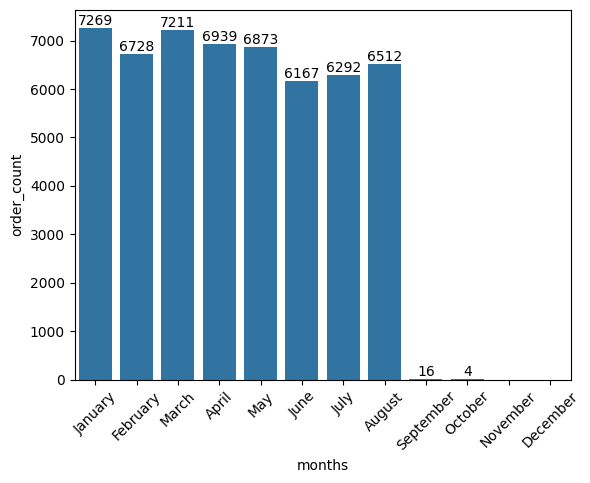

In [9]:
query = """select  monthname(order_purchase_timestamp) month , count(order_id) order_count from orders
where year(order_purchase_timestamp) = 2018
group by month"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data,columns= [ 'months', 'order_count'])
o = ['January','February', 'March','April', 'May','June','July','August','September','October','November','December']
ax = sns.barplot(x = df['months'],y = df['order_count'],order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show


 Find the average number of products per order, grouped by customer city.


In [ ]:
query = """with count_per_order as (select orders.order_id, orders.customer_id, count(order_item.order_id) as oc
from orders join order_item
on orders.order_id  = order_item.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city,avg(count_per_order.oc)
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order """

cursor.execute(query)

data = cursor.fetchall()
df.head(10 )

ProgrammingError: 1054 (42S22): Unknown column 'average_orders' in 'order clause'

 Calculate the percentage of total revenue contributed by each product category.


In [ ]:
query = """SELECT 
    products.product_category AS category, 
    ROUND(
        (SUM(payments.payment_value) / 
        (SELECT SUM(payment_value) FROM payments)) * 100, 2
    ) AS percentage
FROM 
    products 
JOIN 
    order_item
    ON products.product_id = order_item.product_id
JOIN 
    payments
    ON payments.order_id = order_item.order_id
GROUP BY 
    products.product_category
ORDER BY 
    SUM(payments.payment_value) DESC;
"""

cursor.execute(query)

data = cursor.fetchall()
 
df = pd.DataFrame(data, columns=['Category', 'Percentage'])

# Creating a pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    df['Percentage'], 
    labels=df['Category'], 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.viridis.colors[:len(df)], 
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Percentage Contribution by Product Category', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

[('bed table bath', 10.7),
 ('HEALTH BEAUTY', 10.35),
 ('computer accessories', 9.9),
 ('Furniture Decoration', 8.93),
 ('Watches present', 8.93),
 ('sport leisure', 8.7),
 ('housewares', 6.84),
 ('automotive', 5.32),
 ('Garden tools', 5.24),
 ('Cool Stuff', 4.87),
 ('Furniture office', 4.04),
 ('toys', 3.87),
 ('babies', 3.37),
 ('perfumery', 3.17),
 ('telephony', 3.04),
 ('stationary store', 1.98),
 ('pet Shop', 1.94),
 ('PCs', 1.74),
 ('electronics', 1.62),
 (None, 1.58),
 ('Construction Tools Construction', 1.51),
 ('musical instruments', 1.46),
 ('electrostile', 1.41),
 ('Fashion Bags and Accessories', 1.36),
 ('fixed telephony', 1.29),
 ('Games consoles', 1.22),
 ('Bags Accessories', 1.17),
 ('Casa Construcao', 0.85),
 ('Room Furniture', 0.85),
 ('ELECTRICES 2', 0.78),
 ('Agro Industria e Comercio', 0.74),
 ('home appliances', 0.6),
 ('climatization', 0.57),
 ('House comfort', 0.53),
 ('Furniture Kitchen Service Area Dinner and Garden', 0.47),
 ('Construction Tools Illumination',

 Identify the correlation between product price and the number of times a product has been purchased.


In [ ]:
query = """SELECT products.product_category, 
       COUNT(order_item.product_id) AS product_count, 
       ROUND(AVG(order_item.price), 2) AS average_price
FROM products 
JOIN order_item ON products.product_id = order_item.product_id
GROUP BY products.product_category;
"""

cursor.execute(query)

data= cursor.fetchall()
df = pd.DataFrame(data,columns= ['Category','order_count','price'])

arr1 = df['order_count']
arr2 = df['price']

a = np.corrcoef([arr1,arr2])
print('the correlation between price and the number of times a product have been purchased is  ', a)

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

 Calculate the total revenue generated by each seller, and rank them by revenue.


In [ ]:
query ="""select *, rank() over(order by revenue desc) from 
(select order_item.seller_id, sum(payments.payment_value) revenue

from order_item join payments
on order_item.seller_id
group by order_item.seller_id) as a"""


cursor.execute(query)

data = cursor.fetchall()

# Creating DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Seller ID', 'Revenue', 'Rank'])

# Displaying the top 5 sellers
top_5_df = df.head(5)
print(top_5_df)

# Plotting the top 5 sellers by revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='Revenue', y='Seller ID', data=top_5_df, palette='coolwarm')
plt.title('Top 5 Sellers by Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Seller ID', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Calculate the moving average of order values for each customer over their order history.


In [2]:
query = """  SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment,
    AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp 
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM (
    SELECT 
        orders.customer_id,
        orders.order_purchase_timestamp,
        payments.payment_value AS payment
    FROM payments 
    JOIN orders 
    ON payments.order_id = orders.order_id
) subquery;
"""
cursor.execute(query)

data = cursor.fetchall()
df = pd.DataFrame(data)
df.head(10)


OperationalError: 2055: Lost connection to MySQL server at 'localhost:3306', system error: Errno 10038: An operation was attempted on something that is not a socket

 Calculate the cumulative sales per month for each year.

In [ ]:
query = """SELECT 
    years, 
    months, 
    payment, 
    SUM(payment) OVER (ORDER BY years, months) AS cm_sales
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders 
    JOIN payments 
    ON orders.order_id = payments.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp), MONTH(orders.order_purchase_timestamp)
    ORDER BY years, months
) subquery;
"""

cursor.execute(query)

data = cursor.fetchall()

# Creating DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Year', 'Month', 'Monthly Payment', 'Cumulative Sales'])

# Displaying the first 5 rows
print(df.head(5))

# Combining Year and Month for a unified timeline
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

# Plotting cumulative sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Cumulative Sales'], marker='o', linestyle='-', color='b')
plt.title('Cumulative Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Sales', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


 Calculate the year-over-year growth rate of total sales.

In [ ]:
query = """ with a as(
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM orders 
    JOIN payments 
    ON orders.order_id = payments.order_id
    GROUP BY YEAR(orders.order_purchase_timestamp)
    ORDER BY years
) select years, ((payment - lag(payment, 1) over(order by years)) / lag(payment ,1) over ( order by years)) * 100 as previous_year from a """

cursor.execute(query)

data = cursor.fetchall()

# Creating DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Year', 'YoY Change (%)'])

# Displaying the first 5 rows
print(df.head(5))

# Plotting the Year-over-Year Percentage Change
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['YoY Change (%)'], color='skyblue', edgecolor='black')
plt.title('Year-over-Year Percentage Change in Payments', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('YoY Change (%)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Baseline at 0%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.


In [ ]:
query = """ WITH a AS (
    SELECT 
        customers.customer_id, 
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers 
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),  
b AS (
    SELECT 
        a.customer_id, 
        COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a 
    JOIN orders ON orders.customer_id = a.customer_id
                 AND orders.order_purchase_timestamp > a.first_order
                 AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
) 
SELECT 
    100.0 * (COUNT(DISTINCT a.customer_id) / NULLIF(COUNT(DISTINCT b.customer_id), 0)) AS percentage
FROM a 
LEFT JOIN b ON a.customer_id = b.customer_id;
"""

cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data)

df.head(5)


 Identify the top 3 customers who spent the most money in each year.


In [ ]:
query = """select years, customer_id, paymemt, d_rank from 

(select year(orders.order_purchase_timestamp) years ,
orders.customer_id,
sum(payments.payment_value) as payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp))
(order by sum(payments.payment_value) desc)d_rank
from orders join payments
on payment.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
 where d_rank <= 3"""

cursor.execute(query)

data = cursor.fetchall()

# Creating DataFrame with appropriate column names
df = pd.DataFrame(data, columns=['Year', 'Customer ID', 'Payment', 'Rank'])

# Displaying the first 5 rows
print(df.head(5))

# Visualizing the Top 3 Customers' Payments by Year
plt.figure(figsize=(12, 8))
for rank in range(1, 4):
    subset = df[df['Rank'] == rank]
    plt.bar(subset['Year'], subset['Payment'], label=f'Rank {rank}', width=0.8 / 3)

plt.title('Top 3 Customers by Payment per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Payment', fontsize=12)
plt.legend(title='Rank')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()